In [1]:
from mqt.bench import get_benchmark
from qiskit import QuantumCircuit, Aer, execute, assemble
from qiskit.providers.fake_provider import FakeSherbrooke
from qiskit.compiler import transpile
from qiskit.visualization import plot_gate_map
from qiskit.visualization import plot_histogram, plot_bloch_multivector
import numpy as np
import time
import os
from statistics import mean
import matplotlib.pyplot as plt
import re
import csv
from collections import OrderedDict
import warnings

warnings.filterwarnings("ignore")

In [2]:
num = re.compile(r'(\d+)')
def ascending_sort(val):
    split = num.split(val)
    split[1::2] = map(int, split[1::2])
    return split


def file_reader(file_path):
    circuits = []
    file_order = []
    directory = file_path
    for circuit in sorted(os.listdir(directory), key=ascending_sort):
        circuit_path = f"{file_path}/{circuit}"
        if(circuit_path.endswith('.qasm')):
            print(circuit_path)
            qc = QuantumCircuit.from_qasm_file(circuit_path)
            # Gets the name of each circuit in the order it's read
            file_order.append(circuit)
            circuits.append(qc)
    #print(circuits)
    print(file_order) 
    return circuits, file_order

In [3]:


circuits, file_order = file_reader("/Users/noelnegron/Desktop/Demo")

/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_2.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_3.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_4.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_5.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_6.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_7.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_8.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_9.qasm
/Users/noelnegron/Desktop/Demo/dj_indep_qiskit_10.qasm
['dj_indep_qiskit_2.qasm', 'dj_indep_qiskit_3.qasm', 'dj_indep_qiskit_4.qasm', 'dj_indep_qiskit_5.qasm', 'dj_indep_qiskit_6.qasm', 'dj_indep_qiskit_7.qasm', 'dj_indep_qiskit_8.qasm', 'dj_indep_qiskit_9.qasm', 'dj_indep_qiskit_10.qasm']


In [5]:
def runtime_benchmarking(NUM_ITERATIONS, circuits, the_backend):
    BACKEND = the_backend
    Optimization_Levels = {3: [], 2: [], 1: [], 0: []}

    #These array will store:
    mean_transpile_times_1 = []
    mean_transpile_times_2 = []
    mean_transpile_times_3 = []
    
    ttime_level1 = []
    ttime_level2 = []
    ttime_level3 = []
    counter = 0
    
    for circuit in circuits:
        transpiled = False
        temp1 = []
        temp2 = []
        temp3 = []
        for _ in range(NUM_ITERATIONS):
            #Transpilation Level 1:
            start_time = time.perf_counter()
            qc1 = transpile(circuit, optimization_level= 1, seed_transpiler= 42, backend=BACKEND)
            stop_time = time.perf_counter()
            temp1.append(stop_time - start_time)
            #Transpilation Level 2:
            start_time = time.perf_counter()
            qc2 = transpile(circuit, optimization_level= 2, seed_transpiler= 42, backend=BACKEND)
            stop_time = time.perf_counter()
            temp2.append(stop_time - start_time)
            #Transpilation Level 3:
            start_time = time.perf_counter()
            qc3 = transpile(circuit, optimization_level= 3, seed_transpiler= 42, backend=BACKEND)
            stop_time = time.perf_counter()
            temp3.append(stop_time - start_time)
            #If this is the first iteration, then we simply add the circuits to the dictonary
            if transpiled == False:
                Optimization_Levels[3].append(qc3)
                Optimization_Levels[2].append(qc2)
                Optimization_Levels[1].append(qc1)
                Optimization_Levels[0].append(circuit)
                transpiled = True
        #At this point all the data has been added to iteration_times. Now it is just a matter of extracting data.
        ttime_level1.append(temp1)
        ttime_level2.append(temp2)
        ttime_level3.append(temp3)
        
        mean_transpile_times_1.append(mean(temp1))
        mean_transpile_times_2.append(mean(temp2))
        mean_transpile_times_3.append(mean(temp3))
        print("Circuit Index Completed: ", counter)
        counter += 1
    #Scatter Plot for Runtime after all values are collected
    plt.figure(figsize=(12, 6))
    #Number of qubits in the sorted circuit
    number_of_qubits = [i + 2 for i in range(len(mean_transpile_times_1))] #num of qubits
    x = np.array(number_of_qubits)
    #Calculating Line of BEST FIT: Optimization Level 1
    a, b = np.polyfit(x, np.array(mean_transpile_times_1), 1)
    #Calculating Line of BEST FIT: Optimization Level 2
    c, d = np.polyfit(x, np.array(mean_transpile_times_2), 1)
    #Calculating Line of BEST Fit: Optimization Level 3
    e, f = np.polyfit(x, np.array(mean_transpile_times_3), 1)
    plt.scatter(number_of_qubits, mean_transpile_times_1, label = "Average of Opt Level 1")
    plt.plot(x, a*x+b)
    plt.scatter(number_of_qubits, mean_transpile_times_2, label = "Average of Opt Level 2")
    plt.plot(x, c*x+d)
    plt.scatter(number_of_qubits, mean_transpile_times_3, label = "Average of Opt Level 3")
    plt.plot(x, e*x+f)
    plt.xlabel('Number of Qubits')
    plt.ylabel('Runtime in Seconds')
    plt.title('Runtime in Seconds (at each opt level)')
    plt.legend()
    plt.show()
    
    print("mean 1", mean_transpile_times_1)
    print("mean 2", mean_transpile_times_2)
    print("mean 3", mean_transpile_times_3)

    return Optimization_Levels, ttime_level1, ttime_level2, ttime_level3, mean_transpile_times_1, mean_transpile_times_2, mean_transpile_times_3

Circuit Index Completed:  0
Circuit Index Completed:  1
Circuit Index Completed:  2
Circuit Index Completed:  3
Circuit Index Completed:  4
Circuit Index Completed:  5
Circuit Index Completed:  6
Circuit Index Completed:  7
Circuit Index Completed:  8


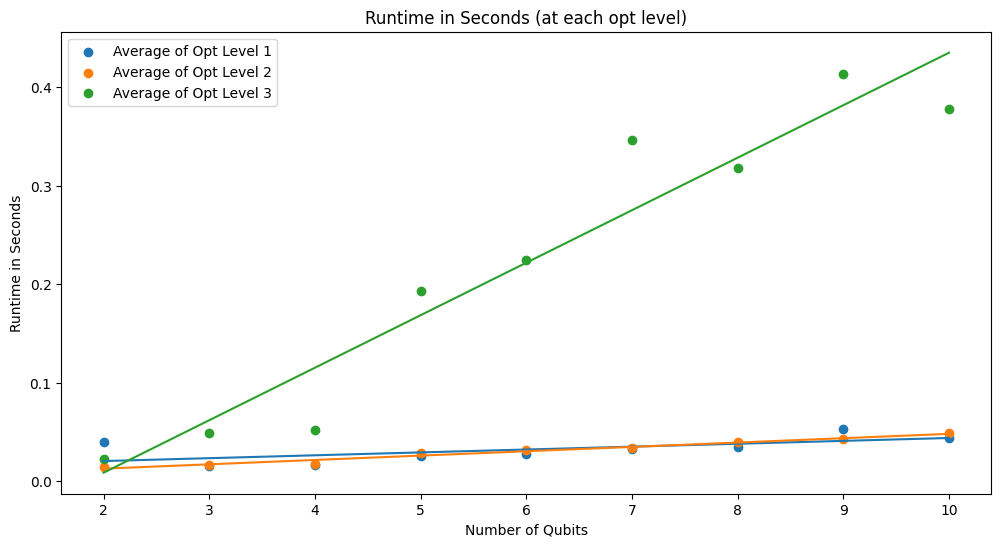

mean 1 [0.03933005845174194, 0.015109350206330419, 0.015894274599850176, 0.02544787502847612, 0.027659616759046914, 0.03236862518824637, 0.03444719165563583, 0.05284254178404808, 0.04399564159102738]
mean 2 [0.014377741608768702, 0.016061800206080078, 0.01763379159383476, 0.02806830038316548, 0.031271708616986874, 0.03332647499628365, 0.03955935835838318, 0.042097325017675755, 0.048922641668468714]
mean 3 [0.02207819977775216, 0.04886998366564512, 0.051756791584193704, 0.193206449970603, 0.22455684198066592, 0.3462110495194793, 0.3182539999950677, 0.4130924916360527, 0.3777867747470737]


In [6]:
backend = FakeSherbrooke()
transpiled_dic, level1_runtime, level2_runtime, level3_runtime, mean_transpile_times_1, mean_transpile_times_2, mean_transpile_times_3 = runtime_benchmarking(5, circuits, backend)

In [7]:
def gate_count(optimization_levels):
    # Transpile each circuit, count the gates, and store the results
    opt1 = []
    opt2 = []
    opt3 = []
    for i in range(len(optimization_levels[1])):
        # counts the number of gates in a given circuit
        opt1_count = optimization_levels[1][i].count_ops()
        opt2_count = optimization_levels[2][i].count_ops()
        opt3_count = optimization_levels[3][i].count_ops()

        # appends our count of the transpiled circuit to the array
        opt1.append(sum(opt1_count.values()))
        opt2.append(sum(opt2_count.values()))
        opt3.append(sum(opt3_count.values()))

    # Generate a graph to visualize the gate counts for optimization level 1
    plt.plot(range(1, len(optimization_levels[1]) + 1), opt1, label = "Optimization Level 1")
    plt.plot(range(1, len(optimization_levels[2]) + 1), opt2, label = "Optimization Level 2")
    plt.plot(range(1, len(optimization_levels[3]) + 1), opt3, label = "Optimization Level 3")
    plt.xlabel('Circuit')
    plt.ylabel('Gate Count')
    plt.title('Gate Count of Transpiled Circuits')
    plt.xticks(range(1, len(optimization_levels[1]) + 1))
    plt.legend()
    plt.show()

    print("gate count level 1", opt1)
    print("gate count level 2", opt2)
    print("gate count level 3", opt3)

    return opt1, opt2, opt3

def num_single_and_multi_qubit_gates(circuit):
    Map = {'single' : 0, "multi" : 0}
    for gate in circuit.data:
        if len(gate[1]) == 1:
            Map['single'] = Map['single'] + 1
        else:
            Map['multi'] = Map['multi'] + 1
    return Map

def single_multi_ratio_benchmarking(optimization_levels):
     #These list will store the ratios (single // Multi ) of each circuit
    level1_list = []
    level2_list = []
    level3_list = []    
    
    for i in range(len(optimization_levels[1])):
        
        level1_data = num_single_and_multi_qubit_gates(optimization_levels[1][i])
        level2_data = num_single_and_multi_qubit_gates(optimization_levels[2][i])
        level3_data = num_single_and_multi_qubit_gates(optimization_levels[3][i])
        
        #Step 3: Prepare ratio and list that contains all the data
        if level1_data['multi'] > 0:
            level1_ratio = level1_data['single'] / level1_data['multi']
            level1_list.append(level1_ratio)
        else:
            level1_list.append(level1_data['single'])
            
        if level2_data['multi'] > 0:
            level2_ratio = level2_data['single'] / level2_data['multi']
            level2_list.append(level2_ratio)
        else:
            level2_list.append(level1_data['single'])
            
        if level3_data['multi'] > 0:
            level3_ratio = level3_data['single'] / level3_data['multi']
            level3_list.append(level3_ratio)
        else:
            level3_list.append(level1_data['single'])
    

    number_of_qubits= [i + 2 for i in range(len(optimization_levels[1]))]

    print("ratio 1", level1_list)
    print("ratio 2", level2_list)
    print("ratio 3", level3_list)

    x = np.array(number_of_qubits)
    
    #Calculating Line of BEST FIT: Optimization Level 1
    a, b = np.polyfit(x, np.array(level1_list), 1)
    #Calculating Line of BEST FIT: Optimization Level 2
    c, d = np.polyfit(x, np.array(level2_list), 1)
    #Calculating Line of BEST Fit: Optimization Lebel 3
    e, f = np.polyfit(x, np.array(level3_list), 1)
    
    #--> Optimization Level 1.. etc lols
    plt.scatter(number_of_qubits, level1_list , label = "Optimization Level 1")    
    plt.plot(x, a*x+b) 
    print("The rate of change for optimization Level 1 is: ", a)
    print("The y-intercept for optimization level 1 is: ", b)
    plt.scatter(number_of_qubits, level2_list, label = "Optimization Level 2")
    plt.plot(x, c*x+d)  
    print("The rate of change for optimization level 2 is: ", c)
    print("The y-intercept for optimization level 2 is: ", d)
    plt.scatter(number_of_qubits, level3_list, label = "Optimization Level 3")
    print("The rate of change for optimization level 3 is: ", e)
    print("The y-intercept for optimization level 3 is: ", f)
    plt.plot(x, e*x+f)  
    plt.title("Transpilation Single Qubit to Multi Qubit gates")
    plt.xlabel('Number of Qubits')
    plt.ylabel('Ratio: (Single | Multi)' )
    plt.legend()
    plt.show()

    return level1_list, level2_list, level3_list

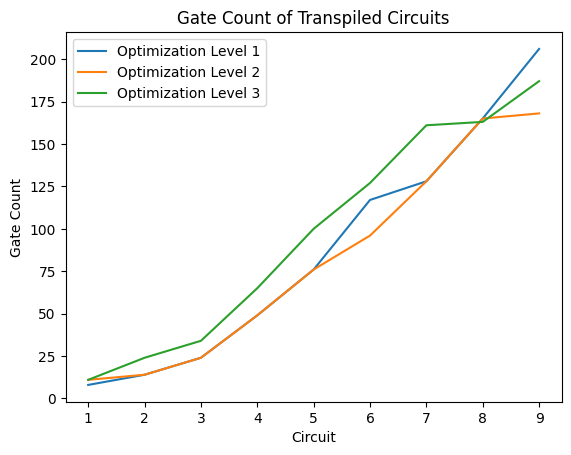

gate count level 1 [8, 14, 24, 49, 76, 117, 128, 165, 206]
gate count level 2 [11, 14, 24, 49, 76, 96, 128, 165, 168]
gate count level 3 [11, 24, 34, 65, 100, 127, 161, 163, 187]
ratio 1 [3.0, 3.6666666666666665, 5.0, 5.125, 5.333333333333333, 5.157894736842105, 5.4, 5.111111111111111, 5.0588235294117645]
ratio 2 [4.5, 3.6666666666666665, 5.0, 5.125, 5.333333333333333, 5.0, 5.4, 5.111111111111111, 5.0]
ratio 3 [4.5, 7.0, 7.5, 7.125, 7.333333333333333, 6.9375, 7.05, 6.761904761904762, 7.130434782608695]
The rate of change for optimization Level 1 is:  0.2233587031303746
The y-intercept for optimization level 1 is:  3.4212732675916393
The rate of change for optimization level 2 is:  0.11680555555555525
The y-intercept for optimization level 2 is:  4.203179012345679
The rate of change for optimization level 3 is:  0.14533255693581715
The y-intercept for optimization level 3 is:  5.943357200368072


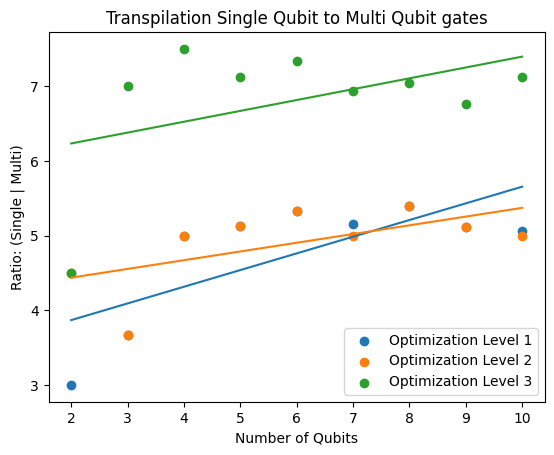

In [8]:
level1_gatecount , level2_gatecount , level3_gatecount = gate_count(transpiled_dic)
level1_ratio, level2_ratio, level3_ratio = single_multi_ratio_benchmarking(transpiled_dic)

In [10]:
### PUT YOUR METHOD HERE:

## YOUR METHOD SHOULD BE ABLE TO TAKE IN THIS DIC: transpiled_dic 
## YOU ALSO NEED TO RETURN 3 lists... ONE for OPTIMIZATION level 1, ONE for level 2... etc.... THIS IS FOR THE CSV FILE (AS SHOWN BELOW). Once you get your method to work, EDIT THE CODE BELOW 
##TO APPEND YOUR RESULTS TO THE CSV FILE.

In [ ]:
with open('noels_test.csv', 'w', newline='') as csvfile:
    # Below is the information we are trying to extract from our circuits
    fieldnames = ['Circuit Name','Average Runtime: Level 1','Level 1 Run Times',
                'Average Runtime: Level 2', 'Level 2 Run Times',
                'Average Runtime: Level 3', 'Level 3 Run Times',
                'Gate Count: Level 1', 'Gate Count: Level 2', 'Gate Count: Level 3',
                'Ratio: Level 1' , 'Ratio: Level 2', 'Ratio Level 3']
    
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames) # calling the writer
    writer.writeheader() # Here we are creating the columns for our CSV file

    for file_name, AVERAGE_Level_1, RUNTIMES_Level1, AVERAGE_Level_2, RUNTIMES_Level2, AVERAGE_Level3, RUNTIMES_Level3, GATECOUNT_1, GATECOUNT_2, GATECOUNT_3, RATIO_1, RATIO_2, RATIO_3 in zip(file_order, mean_transpile_times_1, level1_runtime, mean_transpile_times_2, level2_runtime, mean_transpile_times_3, level3_runtime, level1_gatecount, level2_gatecount, level3_gatecount,level1_ratio, level2_ratio, level3_ratio) :
        writer.writerow({'Circuit Name': file_name,
                        'Average Runtime: Level 1': AVERAGE_Level_1,
                        'Level 1 Run Times': RUNTIMES_Level1,
                        'Average Runtime: Level 2': AVERAGE_Level_2, 
                        'Level 2 Run Times': RUNTIMES_Level2, 
                        'Average Runtime: Level 3': AVERAGE_Level3,
                        'Level 3 Run Times': RUNTIMES_Level3,
                        'Gate Count: Level 1': GATECOUNT_1,
                        'Gate Count: Level 2': GATECOUNT_2,
                        'Gate Count: Level 3': GATECOUNT_3, 
                        'Ratio: Level 1': RATIO_1,
                        'Ratio: Level 2': RATIO_2,
                        'Ratio Level 3': RATIO_3})